# Task 13: Data Manipulation with Pandas

## Data: Online Sales Data

### Importing Libraries:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Load a DataFrame from CSV file:

In [3]:
onlinesalesdata = pd.read_csv('Online Sales Data.csv')
onlinesalesdata

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


##### Set a specific column as the index of the DataFrame.

In [9]:
index_column = 'Region'
onlinesalesdata.set_index(index_column, inplace = True)
onlinesalesdata

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Payment Method
Region,,,,,,,,
North America,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,Credit Card
Europe,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,PayPal
Asia,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Debit Card
North America,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,Credit Card
Europe,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,PayPal
...,...,...,...,...,...,...,...,...
Europe,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,PayPal
Asia,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Debit Card
North America,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,Credit Card


##### Select a specific column and display its values:

In [4]:
product_count = onlinesalesdata['Product Category'].value_counts()
product_count

Electronics        40
Sports             40
Beauty Products    40
Home Appliances    40
Books              40
Clothing           40
Name: Product Category, dtype: int64

##### Select multiple columns and display the resulting DataFrame:

In [10]:
onlinesalesdata[['Product Category', 'Product Name']].value_counts()

Product Category  Product Name                                    
Books             The Catcher in the Rye by J.D. Salinger             2
Electronics       Sony WH-1000XM4 Headphones                          2
Books             The Girl with the Dragon Tattoo by Stieg Larsson    2
                  The Silent Patient by Alex Michaelides              2
Home Appliances   Keurig K-Elite Coffee Maker                         2
                                                                     ..
Electronics       Samsung QLED 4K TV                                  1
                  Samsung Odyssey G9 Gaming Monitor                   1
                  Samsung Odyssey G7 Gaming Monitor                   1
                  Samsung Galaxy Watch 4                              1
Beauty Products   Anastasia Beverly Hills Brow Wiz                    1
Length: 234, dtype: int64

##### Group the DataFrame by specific column and calculate the mean of each group.

In [20]:
grouped_mean = onlinesalesdata.groupby('Product Category').agg({'Units Sold': 'mean', 'Total Revenue': 'mean'})
print("\nMean of Units Sold and Total Revenue by Product Category:")
grouped_mean


Mean of Units Sold and Total Revenue by Product Category:


,Units Sold,Total Revenue
Product Category,,
Beauty Products,1.150,65.54750
Books,2.850,46.54825
Clothing,3.625,203.22325
Electronics,1.650,874.56025
Home Appliances,1.475,466.15400
Sports,2.200,358.16300


##### Group the DataFrame by multiple columns and calculate the sum of each group.

In [19]:
g_sum = onlinesalesdata.groupby(['Region', 'Product Category']).agg({'Units Sold': 'sum', 'Total Revenue': 'sum'})
print("\nSum of Units Sold and Total Revenue by Region and Product Category:")
g_sum


Sum of Units Sold and Total Revenue by Region and Product Category:


Units Sold  Total Revenue
Region        Product Category                           
Asia          Clothing                 145        8128.93
              Sports                    88       14326.52
Europe        Beauty Products           46        2621.90
              Home Appliances           59       18646.16
North America Books                    114        1861.93
              Electronics               66       34982.41

##### Use the agg method to apply multiple aggregation functions to grouped data.

In [22]:
g_agg = onlinesalesdata.groupby('Payment Method').agg({'Units Sold': ['mean', 'sum'], 'Total Revenue': ['mean', 'sum']})

g_agg

Units Sold      Total Revenue          
                     mean  sum          mean       sum
Payment Method                                        
Credit Card      2.233333  268    426.423833  51170.86
Debit Card       3.625000  145    203.223250   8128.93
PayPal           1.312500  105    265.850750  21268.06

##### Select a subset of rows and columns using the .iloc method:

In [4]:
print(onlinesalesdata.iloc[3]) # zero based index

Transaction ID                  10004
Date                       2024-01-04
Product Category                Books
Product Name        The Da Vinci Code
Units Sold                          4
Unit Price                      15.99
Total Revenue                   63.96
Region                  North America
Payment Method            Credit Card
Name: 3, dtype: object


##### Select a subset of rows using the .loc method:

In [12]:
subset_rows_by_condition = onlinesalesdata.loc[onlinesalesdata['Region'] == 'Europe']

print("\nSubset of rows where Region is 'Europe':")
print(subset_rows_by_condition)


Subset of rows where Region is 'Europe':
     Transaction ID        Date Product Category  \
1             10002  2024-01-02  Home Appliances   
4             10005  2024-01-05  Beauty Products   
7             10008  2024-01-08  Home Appliances   
10            10011  2024-01-11  Beauty Products   
13            10014  2024-01-14  Home Appliances   
..              ...         ...              ...   
226           10227  2024-08-14  Beauty Products   
229           10230  2024-08-17  Home Appliances   
232           10233  2024-08-20  Beauty Products   
235           10236  2024-08-23  Home Appliances   
238           10239  2024-08-26  Beauty Products   

                                        Product Name  Units Sold  Unit Price  \
1                                   Dyson V11 Vacuum           1      499.99   
4                            Neutrogena Skincare Set           1       89.99   
7                               Blueair Classic 480i           2      599.99   
10           

##### Validating categorical data:

In [5]:
# Use isin to filter rows based on a list of values.

onlinesalesdata["Product Category"].isin(["Electronics", "Home Appliances"])

0       True
1       True
2      False
3      False
4      False
       ...  
235     True
236    False
237    False
238    False
239    False
Name: Product Category, Length: 240, dtype: bool

##### Subsetting Rows:

In [6]:
# filter for rows where region is Asia
asia_reg = onlinesalesdata[onlinesalesdata["Region"] == "Asia"]

print(asia_reg)

     Transaction ID        Date Product Category  \
2             10003  2024-01-03         Clothing   
5             10006  2024-01-06           Sports   
8             10009  2024-01-09         Clothing   
11            10012  2024-01-12           Sports   
14            10015  2024-01-15         Clothing   
..              ...         ...              ...   
227           10228  2024-08-15           Sports   
230           10231  2024-08-18         Clothing   
233           10234  2024-08-21           Sports   
236           10237  2024-08-24         Clothing   
239           10240  2024-08-27           Sports   

                                Product Name  Units Sold  Unit Price  \
2                           Levi's 501 Jeans           3       69.99   
5                Wilson Evolution Basketball           5       29.99   
8                           Nike Air Force 1           6       89.99   
11          Babolat Pure Drive Tennis Racket           3      199.99   
14             

In [7]:
# filter for rows where total revenue is greater than 499 
# and region is Asia
rev_asia = onlinesalesdata[(onlinesalesdata["Total Revenue"] > 499) & (onlinesalesdata["Region"]== "Asia")]


print(rev_asia)

     Transaction ID        Date Product Category  \
8             10009  2024-01-09         Clothing   
11            10012  2024-01-12           Sports   
14            10015  2024-01-15         Clothing   
35            10036  2024-02-05           Sports   
65            10066  2024-03-06           Sports   
95            10096  2024-04-05           Sports   
113           10114  2024-04-23           Sports   
173           10174  2024-06-22           Sports   
185           10186  2024-07-04           Sports   
221           10222  2024-08-09           Sports   

                                     Product Name  Units Sold  Unit Price  \
8                                Nike Air Force 1           6       89.99   
11               Babolat Pure Drive Tennis Racket           3      199.99   
14                         North Face Down Jacket           2      249.99   
35                                   Peloton Bike           1     1895.00   
65                                Garmin E

### Q. What are the top 10 selling products within each category:

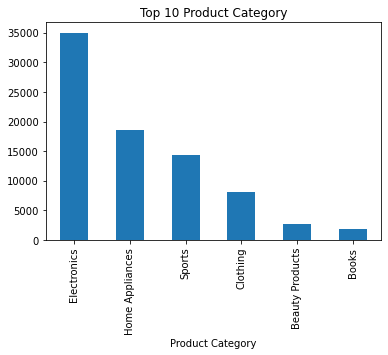

In [10]:
# Top-selling products within each category

top_selling_products = onlinesalesdata.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(10)

top_selling_products.plot(kind='bar')
plt.title('Top 10 Product Category')
plt.show()